---
layout: post
title: python 5阶切比雪夫滤波器
category: dsp
tags: [dsp, ai, python]
---

切比雪夫滤波器是在通带或阻带上频率响应幅度等波纹波动的滤波器。在通带波动的为“I型切比雪夫滤波器”，在阻带波动的为“II型切比雪夫滤波器”。
切比雪夫滤波器相比于巴特沃斯滤波器，其衰减斜率有优势，阻带下降快。

本文使用介绍如何使用 python 得到切比雪夫1型低通滤波器并画出其响应的频谱特性，作为信号处理的入门参考。


B =  [0.00793811 0.03969053 0.07938107 0.07938107 0.03969053 0.00793811]
A =  [ 1.         -2.21875232  3.00186813 -2.45114985  1.23300218 -0.31094873]


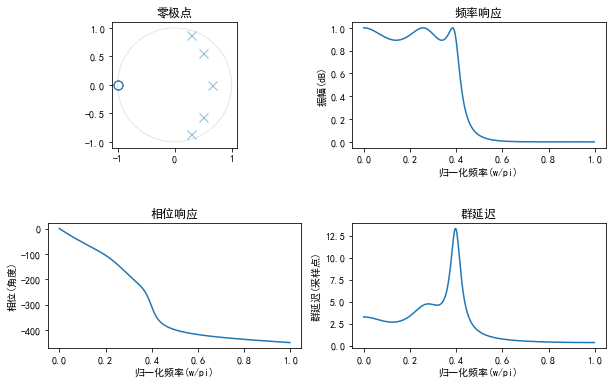

In [4]:
%matplotlib inline
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from matplotlib import patches

worN = 512

## 获取角度，转换成 360 度形式
def angle(h):
    return np.unwrap(np.angle(h)) * 360 / 2 / np.pi


## 画零极点图（matlab 使用 zplane 函数）
def plot_plane(ax, z, p):
    unit_circle = patches.Circle((0,0), radius=1, fill=False, 
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    zeros = plt.plot(z.real, z.imag, 'o', markersize=9, 
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color())
    plt.axis('scaled')
    r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis([-r, r, -r, r])
                     
    
## 切比雪夫1型低通滤波器，增益为1.0, 截止频率为 0.4
B, A = signal.cheby1(5, 1.0, 0.4)

print('B = ', B)
print('A = ', A)

## 频率响应和相位响应
w, H = signal.freqz(B, A, worN=worN, whole=False)


## 群延迟
w1, GD =  signal.group_delay((B, A), w=worN, whole=False)


## 获取零极点
z, p, k = signal.tf2zpk(B, A)

## 频率归一化
f = w/np.pi


plt.figure(figsize=(10,6))
ax = plt.subplot(221)
plt.title('零极点')
plot_plane(ax, z, p)
plt.plot()

plt.subplot(222)
plt.title('频率响应')
plt.xlabel('归一化频率(w/pi)')
plt.ylabel('振幅(dB)')
plt.plot(f, np.abs(H))

plt.subplot(223)
plt.title('相位响应')
plt.xlabel('归一化频率(w/pi)')
plt.ylabel('相位(角度)')
plt.plot(f, angle(H))

plt.subplot(224)
plt.title('群延迟')
plt.xlabel('归一化频率(w/pi)')
plt.ylabel('群延迟(采样点)')
plt.plot(f, GD)

plt.subplots_adjust(hspace=0.6)
plt.show()
